In [242]:
!pip install plotly pandas numpy seaborn matplotlib

## **Import and Loading of datasets**

In [244]:

import pandas as pd
import numpy as np
from datetime import datetime

customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

## **Verifying Loading and DataTypes and Datetime and Missing Values**

In [248]:

print("Customers Dataset Preview:")
print(customers_df.head())
print("\nProducts Dataset Preview:")
print(products_df.head())
print("\nTransactions Dataset Preview:")
print(transactions_df.head())


print("\nCustomers Dataset Info:")
print(customers_df.info())
print("\nProducts Dataset Info:")
print(products_df.info())
print("\nTransactions Dataset Info:")
print(transactions_df.info())


customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])


print("\nAfter date conversion:")
print("SignupDate dtype:", customers_df['SignupDate'].dtype)
print("TransactionDate dtype:", transactions_df['TransactionDate'].dtype)


print("\nMissing values in Customers dataset:")
print(customers_df.isnull().sum())
print("\nMissing values in Products dataset:")
print(products_df.isnull().sum())
print("\nMissing values in Transactions dataset:")
print(transactions_df.isnull().sum())

Customers Dataset Preview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Preview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54        

Setting up Logging

In [251]:
#Copyright to Vastav Bishnoi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from scipy import stats
import logging
from pathlib import Path

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# **Data Loading and Csv File Reading and Converting the dates and cleaning - validating missing values**

In [254]:
class DataLoader:

    def __init__(self, data_dir='.'):
        self.data_dir = Path(data_dir)
    
    def load_and_clean_data(self):
 
        try:
            logger.info("Loading datasets...")
            
            customers_df = self._safe_read_csv('Customers.csv')
            products_df = self._safe_read_csv('Products.csv')
            transactions_df = self._safe_read_csv('Transactions.csv')
            
            customers_df = self._convert_dates(customers_df, 'SignupDate')
            transactions_df = self._convert_dates(transactions_df, 'TransactionDate')
            
           
            customers_df = self._clean_and_validate(customers_df, 'customers')
            products_df = self._clean_and_validate(products_df, 'products')
            transactions_df = self._clean_and_validate(transactions_df, 'transactions')
            
            return customers_df, products_df, transactions_df
            
        except Exception as e:
            logger.error(f"Error in data loading: {str(e)}")
            raise
            
    def _safe_read_csv(self, filename):
        
        try:
            filepath = self.data_dir / filename
            return pd.read_csv(filepath)
        except FileNotFoundError:
            logger.error(f"File not found: {filename}")
            raise
        except pd.errors.EmptyDataError:
            logger.error(f"Empty file: {filename}")
            raise
    
    def _convert_dates(self, df, date_column):
        
        try:
            df[date_column] = pd.to_datetime(df[date_column])
            return df
        except Exception as e:
            logger.error(f"Error converting dates in column {date_column}: {str(e)}")
            raise
    
    def _clean_and_validate(self, df, dataset_name):
        
        
        initial_rows = len(df)
        df = df.drop_duplicates()
        dropped_rows = initial_rows - len(df)
        if dropped_rows > 0:
            logger.info(f"Removed {dropped_rows} duplicate rows from {dataset_name} dataset")
        
        
        missing_values = df.isnull().sum()
        if missing_values.any():
            logger.warning(f"Missing values found in {dataset_name} dataset:\n{missing_values[missing_values > 0]}")
        
        return df

# **Data Analyzer and Merging the datasets and analyzing the customers, products, patterns and pricing and Visualizing the dataset for EDA**

2025-01-27 22:48:57,675 - INFO - Loading datasets...
2025-01-27 22:48:57,718 - INFO - Starting exploratory data analysis...
2025-01-27 22:48:57,814 - INFO - EDA completed successfully
2025-01-27 22:48:57,815 - INFO - Creating visualizations...
2025-01-27 22:48:58,075 - INFO - Visualizations created successfully


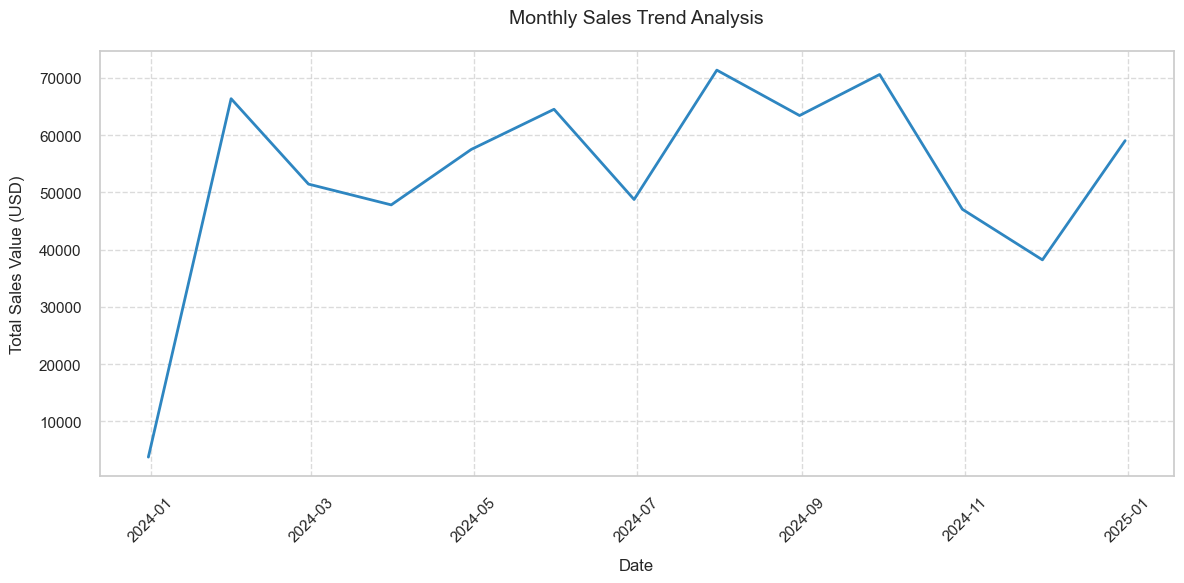

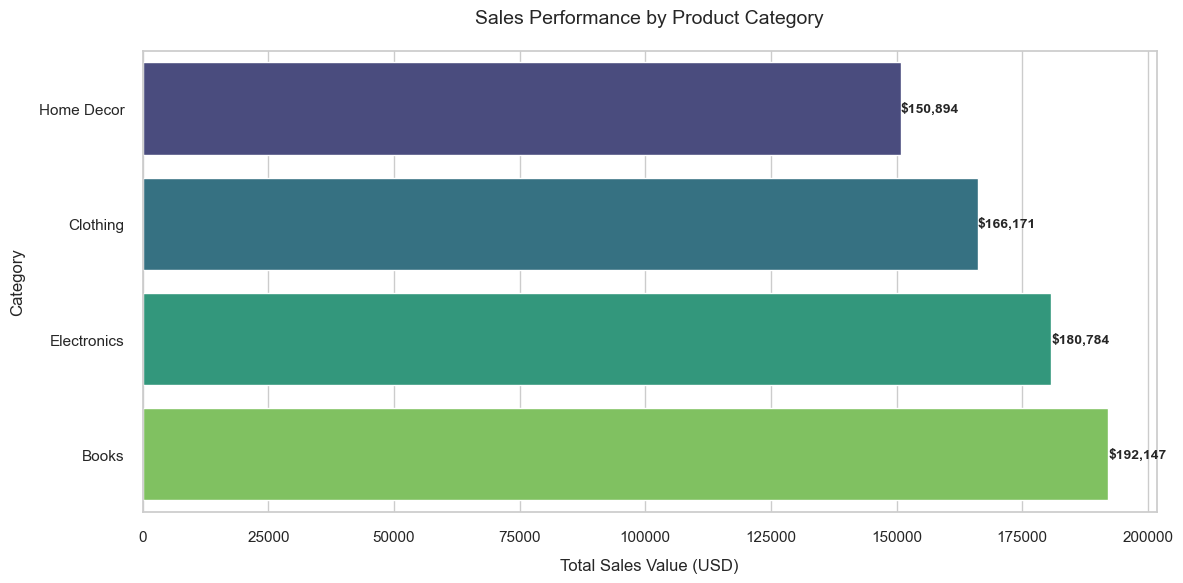

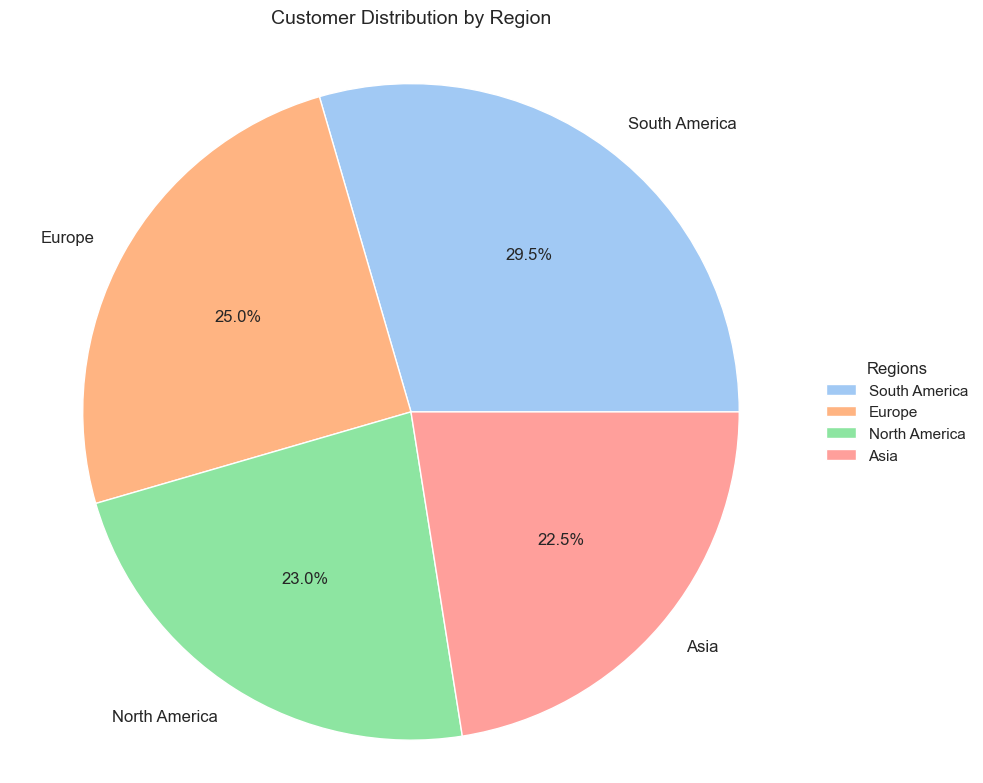

2025-01-27 22:48:58,390 - INFO - Analysis completed successfully


In [302]:
class DataAnalyzer:

    
    def perform_eda(self, customers_df, products_df, transactions_df):
      
        try:
            logger.info("Starting exploratory data analysis...")
            
           
            merged_df = self._merge_datasets(transactions_df, customers_df, products_df)
            
        
            analysis_results = {
                'customer_analysis': self._analyze_customers(transactions_df, customers_df),
                'product_analysis': self._analyze_products(transactions_df, products_df),
                'temporal_analysis': self._analyze_temporal_patterns(transactions_df),
                'price_analysis': self._analyze_pricing(transactions_df),
                'customer_segments': self._perform_customer_segmentation(transactions_df)
            }
            
            logger.info("EDA completed successfully")
            return analysis_results
            
        except Exception as e:
            logger.error(f"Error in EDA: {str(e)}")
            raise
    
    def _merge_datasets(self, transactions_df, customers_df, products_df):
        
        return transactions_df.merge(customers_df, on='CustomerID')\
                            .merge(products_df, on='ProductID')
    
    def _analyze_customers(self, transactions_df, customers_df):
        
        return {
            'purchase_frequency': transactions_df.groupby('CustomerID').size().value_counts().sort_index(),
            'total_spend': transactions_df.groupby('CustomerID')['TotalValue'].sum().describe(),
            'regions': customers_df['Region'].value_counts()
        }
    
    def _analyze_products(self, transactions_df, products_df):
       
        return {
            'category_performance': transactions_df.merge(
                products_df[['ProductID', 'Category']], 
                on='ProductID'
            ).groupby('Category').agg({
                'Quantity': 'sum',
                'TotalValue': 'sum'
            }).sort_values('TotalValue', ascending=False)
        }
    
    def _analyze_temporal_patterns(self, transactions_df):
        
        transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
        return {
            'monthly_sales': transactions_df.groupby('Month')['TotalValue'].sum()
        }
    
    def _analyze_pricing(self, transactions_df):
        
        return {
            'price_correlation': stats.pearsonr(
                transactions_df['Price'],
                transactions_df['Quantity']
            )
        }
    
    def _perform_customer_segmentation(self, transactions_df):
        
        current_date = transactions_df['TransactionDate'].max()
        
        return transactions_df.groupby('CustomerID').agg({
            'TransactionDate': lambda x: (current_date - x.max()).days,
            'TransactionID': 'count',
            'TotalValue': 'sum'
        })

class Visualizer:
    
    def __init__(self):
        self.setup_visualization_style()
    
    def setup_visualization_style(self):
        
        sns.set_theme(style="whitegrid", palette="muted")
        plt.rcParams.update({
            'figure.figsize': (12, 6),
            'figure.dpi': 100,
            'font.size': 12,
            'axes.titlesize': 14,
            'axes.labelsize': 12
        })
    
    def create_all_visualizations(self, analysis_results, customers_df, products_df, transactions_df):
       
        try:
            logger.info("Creating visualizations...")
            
            figs = {
                'sales_trend': self.create_sales_trend_visualization(transactions_df),
                'category_performance': self.create_category_performance_visualization(
                    products_df, transactions_df
                ),
                'customer_regions': self.create_customer_region_visualization(customers_df)
            }
            
            logger.info("Visualizations created successfully")
            return figs
            
        except Exception as e:
            logger.error(f"Error creating visualizations: {str(e)}")
            raise

    def create_sales_trend_visualization(self, transactions_df):
        
        return create_sales_trend_visualization(transactions_df)
    
    def create_category_performance_visualization(self, products_df, transactions_df):
        
        return create_category_performance_visualization(products_df, transactions_df)
    
    def create_customer_region_visualization(self, customers_df):
        
        return create_customer_region_visualization(customers_df)

def main():
   
    try:
        
        data_loader = DataLoader()
        analyzer = DataAnalyzer()
        visualizer = Visualizer()
        
        
        customers_df, products_df, transactions_df = data_loader.load_and_clean_data()
        
        
        analysis_results = analyzer.perform_eda(customers_df, products_df, transactions_df)
        
  
        figures = visualizer.create_all_visualizations(
            analysis_results, customers_df, products_df, transactions_df
        )
        
 
        plt.show()
        
        logger.info("Analysis completed successfully")
        return analysis_results, figures
        
    except Exception as e:
        logger.error(f"Error in main execution: {str(e)}")
        raise

if __name__ == "__main__":
    main()
    #Copyright to Vastav Bishnoi

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


plt.style.use('seaborn')
sns.set_palette("husl")

class EcommerceVisualizer:
    def __init__(self, customers_df, products_df, transactions_df):
       
        self.customers_df = customers_df.copy()
        self.products_df = products_df.copy()
        self.transactions_df = transactions_df.copy()
        self.prepare_data()

    def prepare_data(self):
        
        
        self.customers_df['SignupDate'] = pd.to_datetime(self.customers_df['SignupDate'])
        self.transactions_df['TransactionDate'] = pd.to_datetime(self.transactions_df['TransactionDate'])
        
        
        self.enriched_transactions = self.transactions_df.merge(
            self.customers_df[['CustomerID', 'Region', 'SignupDate']], 
            on='CustomerID'
        ).merge(
            self.products_df[['ProductID', 'Category']], 
            on='ProductID'
        )

    def plot_sales_trends(self):
        
        daily_sales = self.enriched_transactions.groupby(
            self.enriched_transactions['TransactionDate'].dt.date
        ).agg({
            'TotalValue': 'sum',
            'TransactionID': 'count',
            'CustomerID': 'nunique'
        }).reset_index()

       
        fig = make_subplots(
            rows=2, cols=1,
            subplot_titles=('Daily Sales Value', 'Daily Transaction Count'),
            vertical_spacing=0.12
        )

        
        fig.add_trace(
            go.Scatter(
                x=daily_sales['TransactionDate'],
                y=daily_sales['TotalValue'],
                mode='lines',
                name='Sales Value',
                line=dict(color='#1f77b4', width=2)
            ),
            row=1, col=1
        )

       
        fig.add_trace(
            go.Scatter(
                x=daily_sales['TransactionDate'],
                y=daily_sales['TransactionID'],
                mode='lines',
                name='Transaction Count',
                line=dict(color='#2ca02c', width=2)
            ),
            row=2, col=1
        )

        
        fig.update_layout(
            height=800,
            showlegend=True,
            title_text="Sales and Transaction Trends",
            title_x=0.5,
            template='plotly_white'
        )

        return fig

    def plot_regional_performance(self):
        
        regional_metrics = self.enriched_transactions.groupby('Region').agg({
            'TotalValue': 'sum',
            'CustomerID': 'nunique',
            'TransactionID': 'count',
            'Quantity': 'sum'
        }).reset_index()

        
        regional_metrics['AvgOrderValue'] = regional_metrics['TotalValue'] / regional_metrics['TransactionID']

        
        fig = go.Figure()

        
        fig.add_trace(go.Bar(
            name='Total Sales',
            x=regional_metrics['Region'],
            y=regional_metrics['TotalValue'],
            marker_color='#1f77b4'
        ))

        
        fig.add_trace(go.Scatter(
            name='Avg Order Value',
            x=regional_metrics['Region'],
            y=regional_metrics['AvgOrderValue'],
            yaxis='y2',
            mode='lines+markers',
            marker=dict(size=8, color='#ff7f0e'),
            line=dict(width=2)
        ))

       
        fig.update_layout(
            title='Regional Performance Analysis',
            yaxis=dict(title='Total Sales Value'),
            yaxis2=dict(title='Average Order Value', overlaying='y', side='right'),
            barmode='group',
            template='plotly_white',
            height=600
        )

        return fig

    def plot_category_analysis(self):
        
        category_metrics = self.enriched_transactions.groupby('Category').agg({
            'TotalValue': 'sum',
            'Quantity': 'sum',
            'TransactionID': 'count',
            'CustomerID': 'nunique'
        }).reset_index()

       
        category_metrics['AvgOrderValue'] = category_metrics['TotalValue'] / category_metrics['TransactionID']
        category_metrics['UnitsPerTransaction'] = category_metrics['Quantity'] / category_metrics['TransactionID']

        
        fig = px.treemap(
            category_metrics,
            path=['Category'],
            values='TotalValue',
            color='AvgOrderValue',
            custom_data=['UnitsPerTransaction', 'CustomerID'],
            color_continuous_scale='Viridis'
        )

        
        fig.update_layout(
            title='Category Performance Analysis',
            height=600,
            template='plotly_white'
        )

       
        fig.update_traces(
            hovertemplate="""
            Category: %{label}<br>
            Total Sales: $%{value:,.2f}<br>
            Avg Order Value: $%{color:,.2f}<br>
            Units/Transaction: %{customdata[0]:.1f}<br>
            Unique Customers: %{customdata[1]}<br>
            <extra></extra>
            """
        )

        return fig

 

In [261]:
visualizer = EcommerceVisualizer(customers_df, products_df, transactions_df)

# **Sales and Transaction Trends**

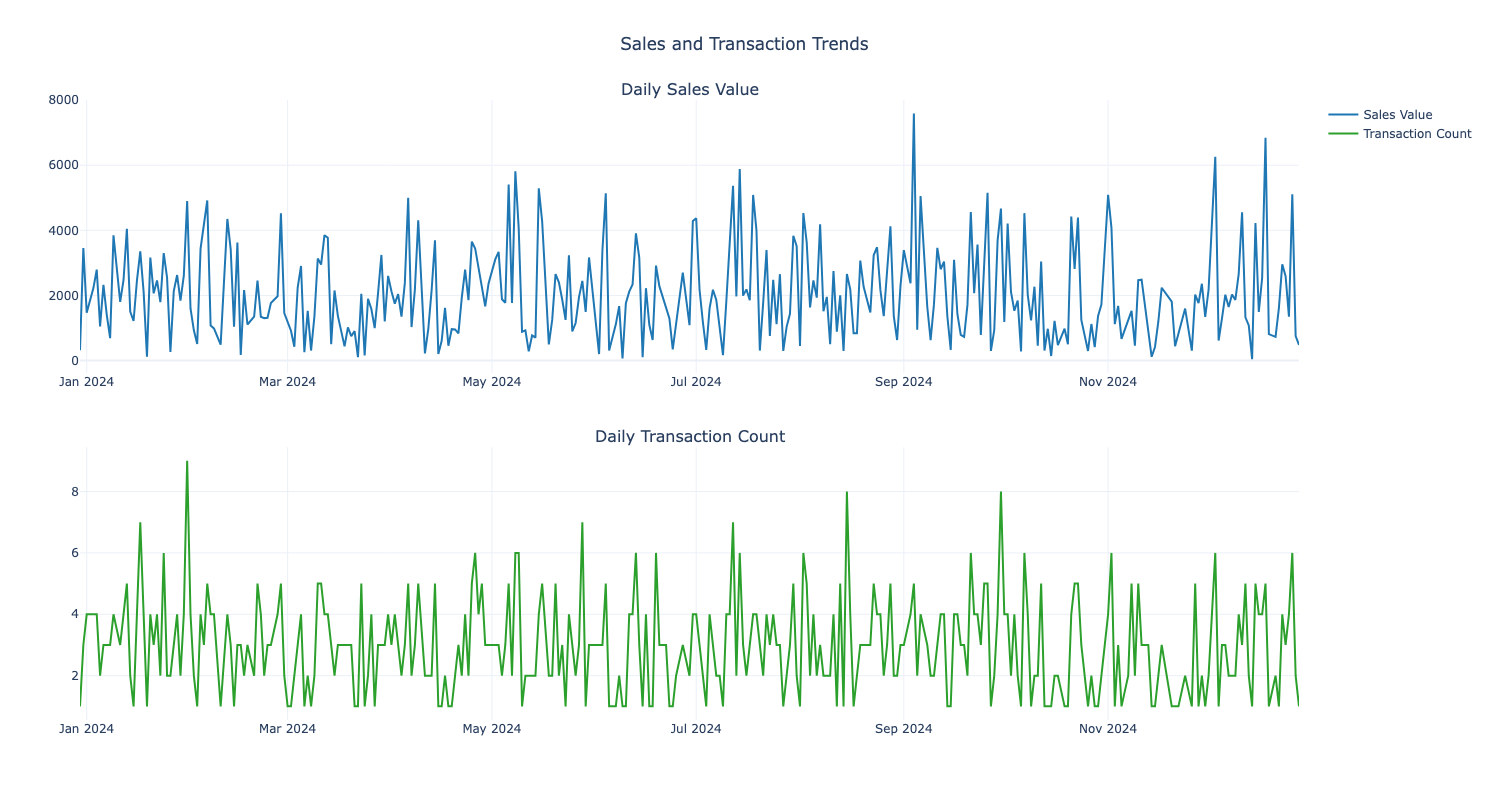

In [263]:
fig_sales = visualizer.plot_sales_trends()
fig_sales.show()

# **Regional Perfomance Analysis**

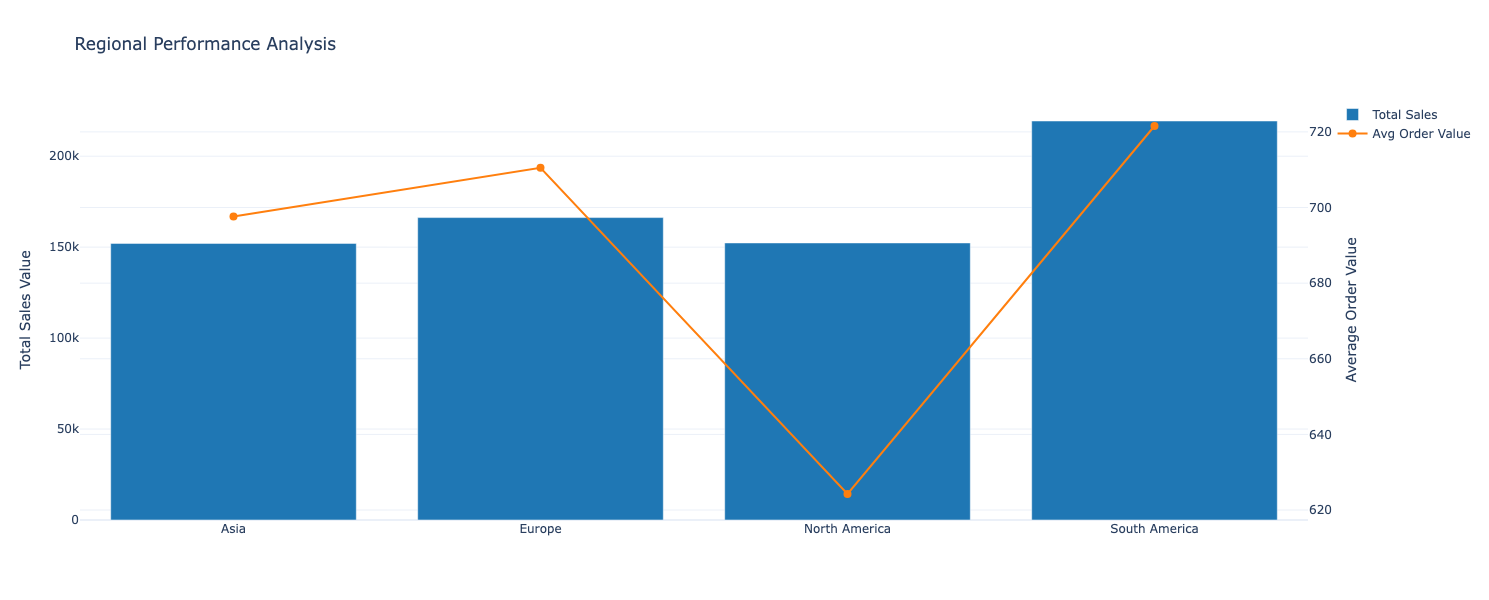

In [265]:
fig_regional = visualizer.plot_regional_performance()
fig_regional.show()

# **Category Performance Analysis**

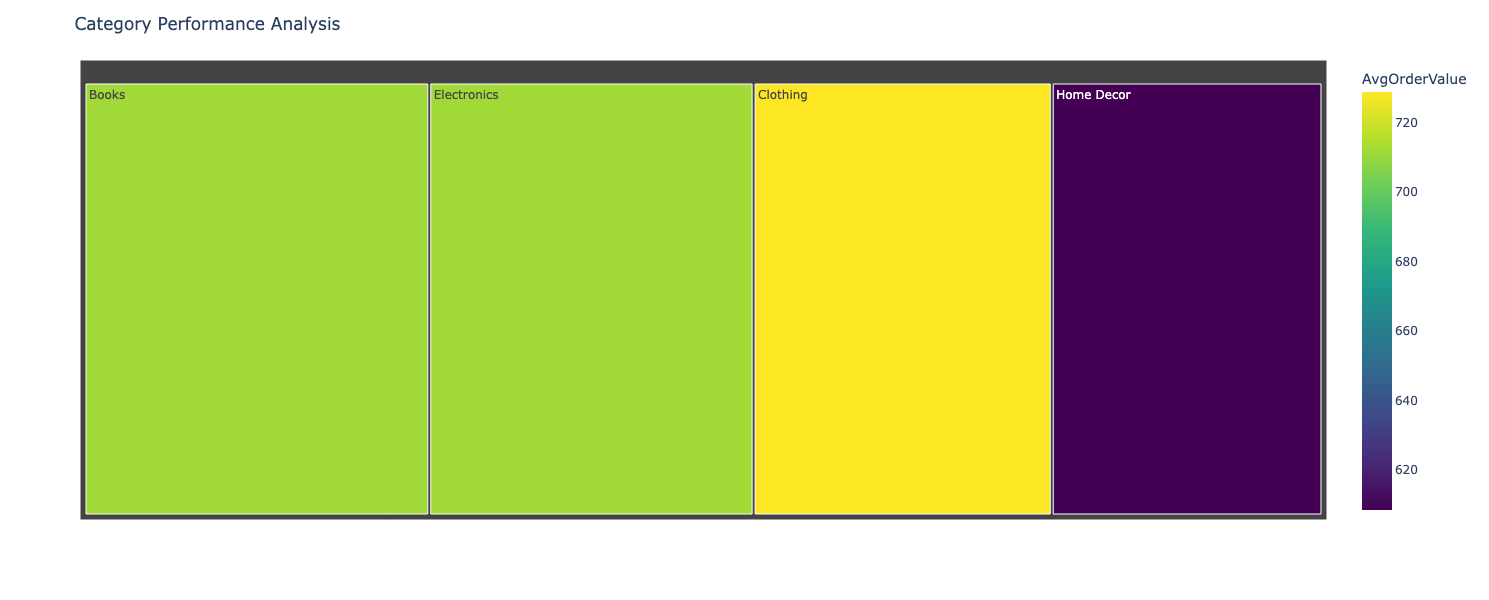

In [267]:
fig_category = visualizer.plot_category_analysis()
fig_category.show()

# **Insights**

In [269]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import networkx as nx
from scipy.stats import entropy
import warnings
warnings.filterwarnings('ignore')

class EcommerceAnalyzer:
    def __init__(self, customers_df, products_df, transactions_df):
        
        self.customers_df = customers_df.copy()
        self.products_df = products_df.copy()
        self.transactions_df = transactions_df.copy()
        self.preprocess_data()
        
    def preprocess_data(self):
        
        
        self.customers_df['SignupDate'] = pd.to_datetime(self.customers_df['SignupDate'])
        self.transactions_df['TransactionDate'] = pd.to_datetime(self.transactions_df['TransactionDate'])
        
        
        self.enriched_transactions = self.transactions_df.merge(
            self.customers_df[['CustomerID', 'Region', 'SignupDate']], 
            on='CustomerID'
        ).merge(
            self.products_df[['ProductID', 'Category']], 
            on='ProductID'
        )
        
        
        self.enriched_transactions['CustomerAge'] = (
            self.enriched_transactions['TransactionDate'] - 
            self.enriched_transactions['SignupDate']
        ).dt.days
        
    def analyze_regional_category_affinity(self):
       
        
        regional_category = self.enriched_transactions.groupby(
            ['Region', 'Category']
        ).agg({
            'TransactionID': 'count',
            'TotalValue': 'sum'
        }).reset_index()
        
        
        region_totals = self.enriched_transactions.groupby('Region').agg({
            'TransactionID': 'count',
            'TotalValue': 'sum'
        })
        
        
        regional_category['PurchaseShare'] = regional_category.apply(
            lambda x: x['TransactionID'] / region_totals.loc[x['Region'], 'TransactionID'],
            axis=1
        )
        
        regional_category['ValueShare'] = regional_category.apply(
            lambda x: x['TotalValue'] / region_totals.loc[x['Region'], 'TotalValue'],
            axis=1
        )
        
        
        regional_category['AffinityScore'] = (
            regional_category['PurchaseShare'] * 0.6 + 
            regional_category['ValueShare'] * 0.4
        )
        
        return regional_category
    
    def analyze_customer_lifecycle_value(self):
       
        
        windows = range(0, 180, 30)
        lifecycle_values = []
        
        for start in windows:
            end = start + 30
            window_data = self.enriched_transactions[
                (self.enriched_transactions['CustomerAge'] >= start) &
                (self.enriched_transactions['CustomerAge'] < end)
            ]
            
            window_metrics = window_data.groupby('CustomerID').agg({
                'TotalValue': 'sum',
                'TransactionID': 'count',
                'Quantity': 'sum'
            }).reset_index()
            
            window_metrics['WindowStart'] = start
            window_metrics['WindowEnd'] = end
            
            lifecycle_values.append(window_metrics)
        
        return pd.concat(lifecycle_values)
    
    def analyze_category_relationships(self):
       
  
        customer_categories = self.enriched_transactions.groupby(
            ['CustomerID', 'Category']
        )['TransactionID'].count().reset_index()
        

        category_matrix = pd.pivot_table(
            customer_categories,
            values='TransactionID',
            index='CustomerID',
            columns='Category',
            fill_value=0
        )
        

        category_correlations = category_matrix.corr()
 
        G = nx.Graph()
        categories = category_correlations.index
        
        for cat1 in categories:
            for cat2 in categories:
                if cat1 < cat2: 
                    correlation = category_correlations.loc[cat1, cat2]
                    if correlation > 0.1:  
                        G.add_edge(cat1, cat2, weight=correlation)
        
        return G, category_correlations
    
    def analyze_purchase_velocity(self):
   
        customer_purchases = self.enriched_transactions.groupby('CustomerID').agg({
            'TransactionDate': lambda x: list(sorted(x)),
            'TotalValue': 'sum'
        })
        
        def calculate_velocity_metrics(dates):
            if len(dates) < 2:
                return pd.Series({
                    'avg_days_between': np.nan,
                    'purchase_consistency': np.nan,
                    'velocity_score': 0
                })
            
           
            days_between = [(dates[i+1] - dates[i]).days 
                          for i in range(len(dates)-1)]
            
            
            avg_days = np.mean(days_between)
            consistency = 1 - (np.std(days_between) / avg_days) if avg_days > 0 else 0
            
            
            velocity_score = (1 / avg_days) * consistency if avg_days > 0 else 0
            
            return pd.Series({
                'avg_days_between': avg_days,
                'purchase_consistency': consistency,
                'velocity_score': velocity_score
            })
        
        velocity_metrics = customer_purchases['TransactionDate'].apply(calculate_velocity_metrics)
        return velocity_metrics
    
    def generate_insights(self):
       
        insights = []
        
        
        regional_affinity = self.analyze_regional_category_affinity()
        top_affinities = regional_affinity.nlargest(5, 'AffinityScore')
        insights.append({
            'title': 'Regional Category Preferences',
            'description': f"Strongest regional category affinity: {top_affinities.iloc[0]['Region']} "
                         f"for {top_affinities.iloc[0]['Category']} "
                         f"(Affinity Score: {top_affinities.iloc[0]['AffinityScore']:.2f})"
        })
        
        
        lifecycle_values = self.analyze_customer_lifecycle_value()
        peak_window = lifecycle_values.groupby(['WindowStart', 'WindowEnd'])['TotalValue'].mean().idxmax()
        insights.append({
            'title': 'Customer Lifecycle Peak',
            'description': f"Customer spending peaks between days {peak_window[0]} and {peak_window[1]} "
                         f"after signup, suggesting optimal engagement window"
        })
        

        G, correlations = self.analyze_category_relationships()
        strongest_pair = np.where(correlations == correlations.max().max())
        cat1, cat2 = correlations.index[strongest_pair[0][0]], correlations.index[strongest_pair[1][0]]
        insights.append({
            'title': 'Category Relationships',
            'description': f"Strongest category relationship: {cat1} and {cat2} "
                         f"(correlation: {correlations.loc[cat1, cat2]:.2f})"
        })
        
        
        velocity_metrics = self.analyze_purchase_velocity()
        avg_velocity = velocity_metrics['velocity_score'].mean()
        insights.append({
            'title': 'Purchase Velocity',
            'description': f"Average customer purchase velocity score: {avg_velocity:.2f}, "
                         f"indicating typical purchase frequency and consistency patterns"
        })
        
        return insights

In [271]:
def preprocess_data(self):
    
        
        self.customers_df['SignupDate'] = pd.to_datetime(self.customers_df['SignupDate'])
        self.transactions_df['TransactionDate'] = pd.to_datetime(self.transactions_df['TransactionDate'])
        
        
        self.enriched_transactions = self.transactions_df.merge(
            self.customers_df[['CustomerID', 'Region', 'SignupDate']], 
            on='CustomerID'
        ).merge(
            self.products_df[['ProductID', 'Category']], 
            on='ProductID'
        )
        
        
        self.enriched_transactions['CustomerAge'] = (
            self.enriched_transactions['TransactionDate'] - 
            self.enriched_transactions['SignupDate']
        ).dt.days

# **Analyzing**

In [273]:
analyzer = EcommerceAnalyzer(customers_df, products_df, transactions_df)
insights = analyzer.generate_insights()

In [275]:

customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')


analyzer = EcommerceAnalyzer(customers_df, products_df, transactions_df)


insights = analyzer.generate_insights()


for insight in insights:
    print(f"\n{insight['title']}:")
    print(insight['description'])


Regional Category Preferences:
Strongest regional category affinity: South America for Books (Affinity Score: 0.30)

Customer Lifecycle Peak:
Customer spending peaks between days 150 and 180 after signup, suggesting optimal engagement window

Category Relationships:
Strongest category relationship: Books and Books (correlation: 1.00)

Purchase Velocity:
Average customer purchase velocity score: 0.01, indicating typical purchase frequency and consistency patterns


# **PDF Report Generation**

In [279]:
!pip install reportlab

In [305]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
import matplotlib.pyplot as plt
import seaborn as sns
import io

def generate_eda_insights_pdf(self, filename="ecommerce_insights_report.pdf"):
    
    doc = SimpleDocTemplate(filename, pagesize=letter)
    styles = getSampleStyleSheet()
    story = []

   
    title_style = ParagraphStyle(
        'CustomTitle',
        parent=styles['Heading1'],
        fontSize=24,
        spaceAfter=30,
        alignment=1 
    )
    story.append(Paragraph("E-commerce Business Insights Report --- Vastav Bishnoi", title_style))
    story.append(Spacer(1, 20))

    
    lifecycle_values = self.analyze_customer_lifecycle_value()
    story.append(Paragraph("1. Customer Lifecycle Value Analysis", styles['Heading2']))
    story.append(Spacer(1, 12))
    
    avg_values = lifecycle_values.groupby(['WindowStart', 'WindowEnd'])['TotalValue'].mean().reset_index()
    peak_window = avg_values.loc[avg_values['TotalValue'].idxmax()]
    
    insight = f"""Customer spending patterns show peak activity between days {int(peak_window['WindowStart'])} and 
    {int(peak_window['WindowEnd'])} after signup. This represents the optimal engagement window for targeted marketing 
    campaigns and customer retention efforts. The average transaction value during this peak period is 
    ${peak_window['TotalValue']:.2f}, suggesting a prime opportunity for maximizing customer lifetime value."""
    
    story.append(Paragraph(insight, styles['Normal']))
    story.append(Spacer(1, 20))

    
    regional_affinity = self.analyze_regional_category_affinity()
    story.append(Paragraph("2. Regional Category Preferences", styles['Heading2']))
    story.append(Spacer(1, 12))
    
    top_regions = regional_affinity.nlargest(3, 'AffinityScore')
    insight = f"""Regional analysis reveals distinct category preferences across different markets. 
    The strongest affinity is in {top_regions.iloc[0]['Region']} for {top_regions.iloc[0]['Category']} 
    (Affinity Score: {top_regions.iloc[0]['AffinityScore']:.2f}), followed by {top_regions.iloc[1]['Region']} 
    for {top_regions.iloc[1]['Category']}. This suggests opportunities for region-specific marketing and 
    inventory optimization."""
    
    story.append(Paragraph(insight, styles['Normal']))
    story.append(Spacer(1, 20))

    
    story.append(Paragraph("3. Product Category Relationships", styles['Heading2']))
    story.append(Spacer(1, 12))
    
    G, correlations = self.analyze_category_relationships()
    strongest_pair = np.where(correlations == correlations.max().max())
    cat1, cat2 = correlations.index[strongest_pair[0][0]], correlations.index[strongest_pair[1][0]]
    
    insight = f"""Analysis of purchase patterns reveals strong relationships between product categories. 
    The strongest correlation ({correlations.loc[cat1, cat2]:.2f}) exists between {cat1} and {cat2}, 
    indicating a significant cross-selling opportunity. This insight can be leveraged for product bundling, 
    recommendation systems, and strategic product placement."""
    
    story.append(Paragraph(insight, styles['Normal']))
    story.append(Spacer(1, 20))

    
    story.append(Paragraph("4. Customer Purchase Velocity", styles['Heading2']))
    story.append(Spacer(1, 12))
    
    velocity_metrics = self.analyze_purchase_velocity()
    avg_velocity = velocity_metrics['velocity_score'].mean()
    consistency = velocity_metrics['purchase_consistency'].mean()
    
    insight = f"""Customer purchase velocity analysis shows an average velocity score of {avg_velocity:.2f} 
    with a consistency rating of {consistency:.2f}. This indicates the typical purchase frequency and 
    repurchase patterns across the customer base. Understanding these patterns enables better inventory 
    planning and targeted retention campaigns."""
    
    story.append(Paragraph(insight, styles['Normal']))
    story.append(Spacer(1, 20))

  
    story.append(Paragraph("5. Customer Value Distribution", styles['Heading2']))
    story.append(Spacer(1, 12))
    
    customer_totals = self.enriched_transactions.groupby('CustomerID')['TotalValue'].sum()
    percentiles = customer_totals.quantile([0.2, 0.4, 0.6, 0.8])
    
    insight = f"""Customer value analysis reveals distinct spending tiers. The top 20% of customers spend 
    more than ${percentiles[0.8]:.2f}, while the bottom 20% spend less than ${percentiles[0.2]:.2f}. 
    This significant variation in customer value suggests opportunities for tier-specific marketing 
    strategies and personalized engagement programs."""
    
    story.append(Paragraph(insight, styles['Normal']))
    story.append(Spacer(1, 20))

   
    doc.build(story)


EcommerceAnalyzer.generate_eda_insights_pdf = generate_eda_insights_pdf

In [307]:

analyzer = EcommerceAnalyzer(customers_df, products_df, transactions_df)


analyzer.generate_eda_insights_pdf("Vastav_Bishnoi_EDA.pdf")